
🏳️ 3.1 퍼셉트론



In [5]:
# 코드 3-1 파이토치로 구현한 퍼셉트론
import torch
import torch.nn as nn

class Perceptron (nn.Module):
  """ 퍼셉트론은 하나의 선형 층입니다 """
  def __init__(self,input_dim):
    """
    매개변수 :
        input_dim (int) : 입력 특성의 크기
    """
    super(Perceptron, self).__init__()
    self.fc1 = nn.Linear(input_dim, 1) # 출력 차원 1로 설정=하나의 스칼라 값을 예측하도록

  def forward(self, x_in):
    """퍼셉트론의 정방향 계산

    매개변수:
      x_in (torch.Tensor): 입력 데이터 텐서
          x_in.shape는 (batch, num_features)입니다.

    반환값:
       결과 텐서, tensor.shape는 (batch,)입니다.
    """
    return torch.sigmoid(self.fc1(x_in)).squeeze() #torch.sigmoid 함수를 사용하여 [0, 1] 범위로 제한
    #주로 이진 분류
# squeeze() 메서드: 최종 출력 텐서에서 불필요한 차원을 제거합니다.
# 이는 (batch_size, 1) 형태의 출력을 (batch_size,)로 축소하여 각 샘플의 예측 결과를 더 쉽게 접근할 수 있도록 합니다.


PyTorch 라이브러리를 사용하여 단순한 퍼셉트론 모델을 구현한 것입니다. 퍼셉트론은 입력을 받아 하나의 출력을 내는 가장 간단한 형태의 신경망 구조입니다. 코드의 주요 부분을 분석해보겠습니다.

클래스 정의와 초기화:

Perceptron 클래스는 torch.nn.Module을 상속받습니다. 이는 PyTorch에서 제공하는 모든 신경망 모듈의 기본 클래스입니다.
__init__ 메소드에서는 input_dim을 인자로 받아, 이를 이용해 내부에 선형 레이어 (nn.Linear)를 정의합니다. 이 선형 레이어는 입력 차원에서 1차원 출력으로 매핑합니다.
forward 메소드:

신경망에서 입력 데이터 x를 받아 출력을 계산하는 메소드입니다.
입력 x는 torch.Tensor 타입이며, (batch, num_features)의 모양을 가집니다. 여기서 batch는 배치 크기이고 num_features는 각 데이터 포인트의 특성(차원) 수입니다.
nn.Linear을 통과한 결과에 torch.sigmoid 함수를 적용해 결과를 [0, 1] 범위로 제한합니다. 이는 퍼셉트론이 분류 문제에서 주로 사용되기 때문에, 출력을 확률로 해석할 수 있게 합니다.
squeeze() 함수는 결과 텐서의 차원을 조정합니다. 만약 결과가 [batch, 1] 형태라면, squeeze()를 통해 [batch]로 차원을 축소하여 각 샘플의 출력을 단순화합니다.
이 코드의 사용 예로는 간단한 이진 분류 문제가 있을 수 있습니다. 예를 들어, 입력 특성에 따라 어떤 샘플이 특정 범주에 속하는지 (예: 스팸 메일 분류) 결정하는데 사용될 수 있습니다. 입력 차원, 즉 특성의 수를 조정함으로써 다양한 데이터셋에 적용 가능합니다.








🏳️ 3.2 활성화 함수

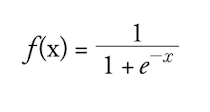

<ipython-input-6-10cab55f3467>:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x= torch.range(-5.,5.,0.1)


<function matplotlib.pyplot.show(close=None, block=None)>

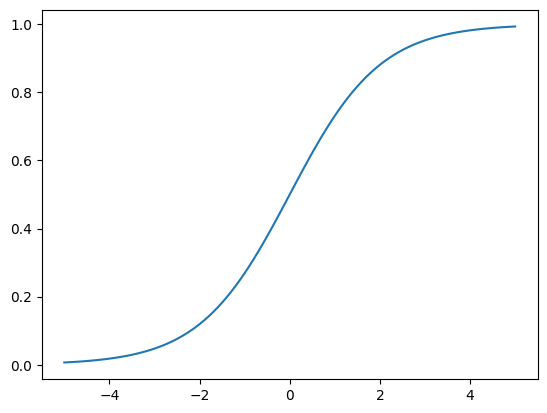

In [6]:
# 코드 3-2 시그모이드 활성화 함수
# 임의의 실숫값을 받아 0~1사이로 압축
# 그레이디언트 베니싱 (소실) 문제, 폭주 문제
import torch
import matplotlib.pyplot as plt

x= torch.range(-5.,5.,0.1)
y= torch.sigmoid(x)
plt.plot(x.numpy(),y.numpy())
plt.show

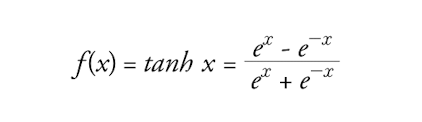

<ipython-input-7-53fb68d1ea7f>:6: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x= torch.range(-5.,5.,0.1)


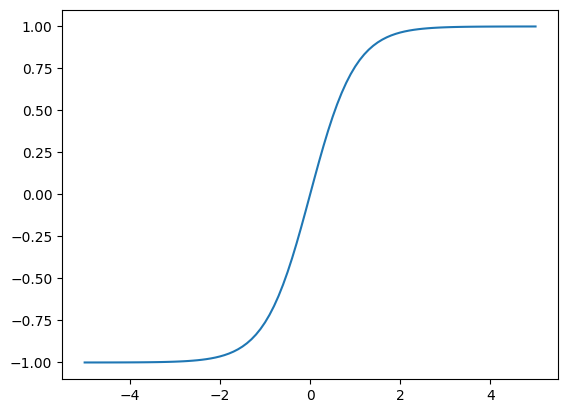

In [7]:
# 코드 3-3 하이퍼볼릭 탄젠트 활성화 함수
# 시그모이드 변종 -1 ~ +1
import torch
import matplotlib.pyplot as plt

x= torch.range(-5.,5.,0.1)
y= torch.tanh(x)

plt.plot(x.numpy(),y.numpy())
plt.show()

<ipython-input-8-7768041131b0>:10: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x= torch.range(-5.,5.,0.1)


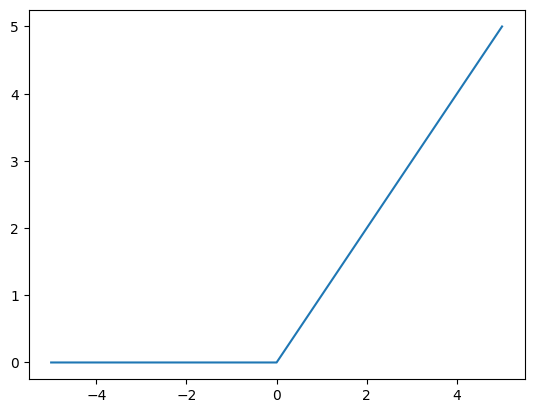

In [8]:
# 코드 3-4 렐루 활성화 함수 -> 딥러닝 혁신
# f(x) = max(0,x)
# 음숫값을 0으로 자름 -> 그레이디언트 소실 문제에 도움
# 문제: 특정 출력이 0이 되면 다시 돌아오지 않음 -> 리키 렐루 , 파라메트릭 렐루 활성화 함수 사용

import torch
import matplotlib.pyplot as plt

relu = torch.nn.ReLU()
x= torch.range(-5.,5.,0.1)
y= relu(x)

plt.plot(x.numpy(),y.numpy())
plt.show()

In [10]:
# # 코드 3-5 PReLU 활성화 함수
# # f(x) = max(x,ax)

# import torch
# import matplotlib.pyplot as plt

# prelu = torch.nn.PReLU(num_parameters=1)

# x= torch.range(-5.,5.,0.1)
# y= prelu(x)

# plt.plot(x.numpy(),y.numpy())
# plt.show()

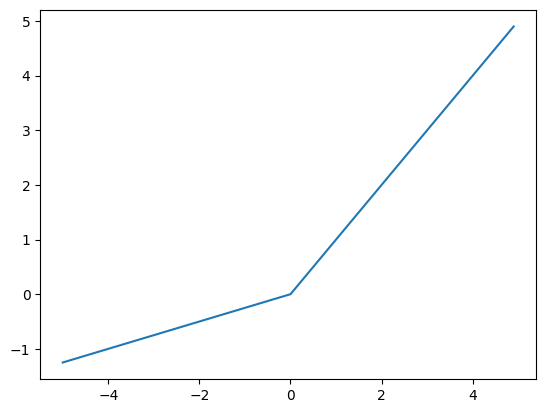

In [11]:
import torch
import matplotlib.pyplot as plt

prelu = torch.nn.PReLU(num_parameters=1)

x = torch.arange(-5., 5., 0.1)  # torch.range 대신 torch.arange 사용
y = prelu(x)

plt.plot(x.detach().numpy(), y.detach().numpy())  # detach() 메소드를 사용하여 그래디언트 계산 중지
plt.show()


In [12]:
# 코드 3-6 소프트맥스 활성화 함수
# 0~1 사이 압축
# 모든 출력의 합으로 각 출력을 나누어 k 개 클래스에 대한 이산 확률(0~1) 분포(합이 1) => 분류 작업에 굿~
# w/ 범주형 크로스 엔트로피 (확률 기반의 목적 함수)) #주로 다중 클래스 분류 문제에서 사용
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1) #dim=1은 각 행(여기서는 배치 내 각 샘플)의 모든 열에 대해 소프트맥스를 적용하라는 의미
#dim=0으로 소프트맥스 함수를 적용하면, 텐서의 첫 번째 차원, 즉 배치 차원
x_input = torch.randn(1,3) # 평균 0, 표준편차 1의 정규 분포를 따르는 무작위 값들로 구성된 1x3 텐서를 생성
y_output = softmax(x_input) #적용
print(x_input)
print(y_output)
print(torch.sum(y_output, dim = 1))



tensor([[-2.0834,  0.5520,  0.5616]])
tensor([[0.0344, 0.4805, 0.4851]])
tensor([1.])


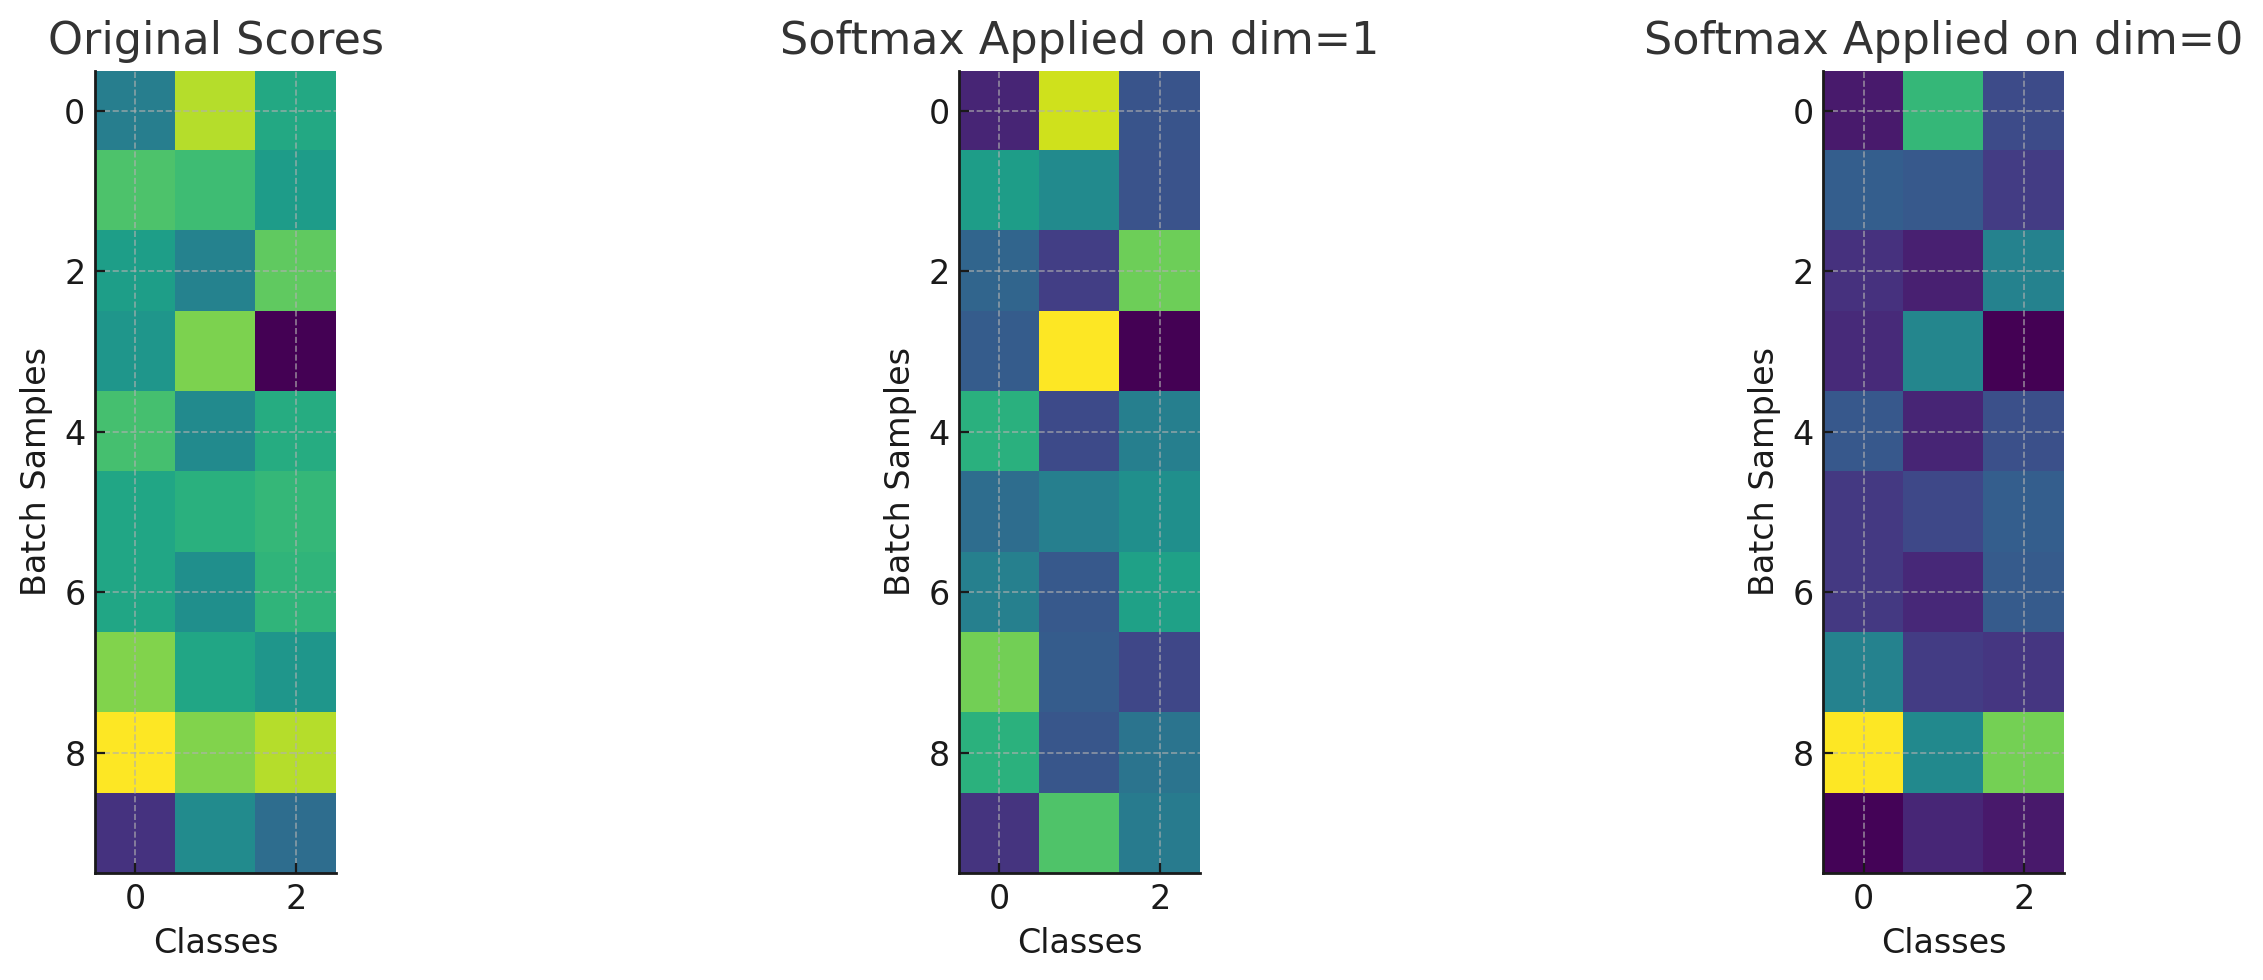

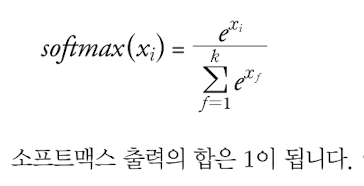

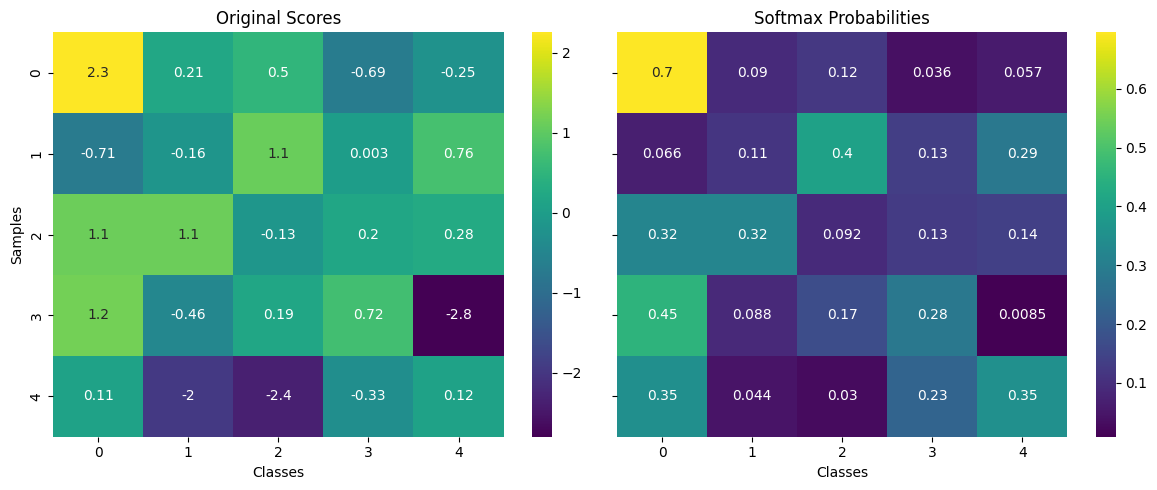

In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# 소프트맥스 함수 정의
softmax = nn.Softmax(dim=1)

# 입력 텐서 생성
x_input = torch.randn(5, 5)  # 배치 사이즈 5, 클래스 5

# 소프트맥스 적용
y_output = softmax(x_input)

# 데이터 추출
scores = x_input.detach().numpy()
probabilities = y_output.detach().numpy()

# 시각화 준비
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# 원본 점수 히트맵
sns.heatmap(scores, ax=axes[0], annot=True, cmap='viridis', cbar=True)
axes[0].set_title('Original Scores')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Samples')

# 소프트맥스 적용 후 확률 히트맵
sns.heatmap(probabilities, ax=axes[1], annot=True, cmap='viridis', cbar=True)
axes[1].set_title('Softmax Probabilities')
axes[1].set_xlabel('Classes')

# 출력
plt.tight_layout()
plt.show()


🏳️ 3.3 손실 함수

In [14]:
# 코드 3-7 평균 제곱 오차 손실 MSE (mean squared error)
# 평균 절댓값 오차 MAE(mean absolute error)
# 평균 제곱근 오차 Root mean squared



import torch
import torch.nn as nn

mse_loss = nn.MSELoss()

#신경망의 출력(output)을 시뮬레이션하기 위한 것
outputs = torch.randn(3,5,requires_grad = True) #(3x5)의 텐서를 생성하고, 그 요소들을 평균이 0이고 표준편차가 1인 정규 분포에서 무작위로 샘플링하여 채움

#3x5 텐서는 목표값(target) 또는 실제값 = 정답 (무작위로 생성)
#출력값과 비교되어 손실(loss)을 계산하는 데 사용
targets = torch.randn(3,5)
loss = mse_loss (outputs, targets)
print(loss)

tensor(3.1573, grad_fn=<MseLossBackward0>)


In [15]:
# 코드 3-8 크로스 엔트로피 손실
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3,5,requires_grad=True)
# 평균 0, 표준편차 1의 정규 분포에서 무작위 값을 샘플링하여 3x5 텐서를 생성
# 이 텐서는 신경망이 각 클래스에 대해 예측한 점수(logit)를 나타냄
# 3은 배치 크기를, 5는 클래스 수를 의미
targets = torch.tensor([1,0,3],dtype= torch.int64)

#여기서는 3개의 입력 샘플이 있으며, 각 샘플의 레이블은 1, 0, 3입니다.
# 이는 첫 번째 샘플이 두 번째 클래스(1), 두 번째 샘플이 첫 번째 클래스(0), 세 번째 샘플이 네 번째 클래스(3)에 속함을 의미합니다.

loss = ce_loss(outputs, targets)
# outputs와 정답 레이블 targets 사이의 크로스 엔트로피 손실을 계산
print(loss)

tensor(2.5090, grad_fn=<NllLossBackward0>)


In [16]:
# 코드 3-9 이진 크로스 엔트로피 손실
import torch
import torch.nn as nn

bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid ()
probabilities = sigmoid(torch.randn(4,1,requires_grad = True)) # 이진 확률 벡터 생성
targets = torch.tensor([1,0,1,0],dtype= torch.float32).view(4,1)
loss = bce_loss(probabilities, targets)

print(probabilities)
print(loss)

tensor([[0.7646],
        [0.6904],
        [0.2941],
        [0.5988]], grad_fn=<SigmoidBackward0>)
tensor(0.8945, grad_fn=<BinaryCrossEntropyBackward0>)


In [17]:
# 코드 3-10 Adam 옵티마이저 준비
import torch.nn as nn
import torch.optim as optim

input_dim=2
lr = 0.001

perceptron = Perceptron(input_dim= input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(),lr=lr)

In [22]:
# 코드 3-11 퍼셉트론과 이진 분류를 위한 지도 학습 훈련 반복

# 각 에포크는 전체 훈련 데이터를 사용합니다.
for epoch_i in range (n_epochs):
  # 내부 반복은 데이터셋에 있는 배치에 대해 수행됩니다
  for batch_i in range(n_batches):

    # 0단계: 데이터 가져오기
    x_data, y_target = get_toy_data(batch_size)

    # 1단계: 그레이디언트 초기화
    perceptron.zero_grad()
    # 2단계: 모델의 정방향 계산 수행하기
    y_pred = perceptron(x_data, apply_sigmoid = True)
    # 3단계: 최적하려는 손실 계산하기
    loss = bce_loss(y_pred, y_target)
    # 4단계: 손실 신호를 거꾸로 전파하기
    loss.backward()
    # 5단계: 옵티마이저로 업데이트하기
    optimizer.step()



NameError: name 'n_epochs' is not defined

In [23]:
# 코드 3-12 훈련, 검증, 테스트 세트 만들기
import collections
import pandas as pd
import numpy as np

# ex. 옐프 레스토랑 등급 리뷰 데이터셋

# 별점 기준으로 나누어 훈련, 검증, 테스트를 만듭니다.
by_rating = collections.defaultdict(list)
for _, row in review_subset.iterrows():
  by_rating[row.rating].append(row.to_dict())

# 분할 데이터를 만듭니다.
final_list = []
np.random.seed(args.seed)

for _, item_list in sorted(by_rating.items()):
  np.random.shuffle(item_list)
  n_total = len(item_list)
  n_train = int(args.train_proportion * n_total)
  n_val = int(args.val_proportion * n_total)
  n_test = int(args.test_proportion * n_total)

  for item in item_list[:n_train]:
      item['split']='train'

  for item in item_list[n_train:n_train + n_val]:
      item ['split']='val'

  for item in item_list[n_train + n_val :n_train + n_val+n_test]:
      item ['split']='test'

  # 최종 리스트에 추가합니다
  final_list.extend(item_list)


final_reviews = pd.DataFrame(final_list)

NameError: name 'review_subset' is not defined

In [21]:
import collections
import pandas as pd
import numpy as np

# 예시 args 설정
args = {
    'seed': 123,
    'train_proportion': 0.7,
    'val_proportion': 0.15,
    'test_proportion': 0.15
}

# 데이터 불러오기 예시 (review_subset)
# review_subset = pd.read_csv('path_to_your_dataset.csv')

by_rating = collections.defaultdict(list)
for _, row in review_subset.iterrows():
    by_rating[row.rating].append(row.to_dict())

# 분할 데이터를 만듭니다.
final_list = []
np.random.seed(args['seed'])

for _, item_list in sorted(by_rating.items()):
    np.random.shuffle(item_list)
    n_total = len(item_list)
    n_train = int(args['train_proportion'] * n_total)
    n_val = int(args['val_proportion'] * n_total)
    n_test = int(args['test_proportion'] * n_total)

    for item in item_list[:n_train]:
        item['split'] = 'train'

    for item in item_list[n_train:n_train + n_val]:
        item['split'] = 'val'

    for item in item_list[n_train + n_val:n_train + n_val + n_test]:
        item['split'] = 'test'

    final_list.extend(item_list)

final_reviews = pd.DataFrame(final_list)


NameError: name 'review_subset' is not defined

In [ ]:
# 코드 3-13 최소한의 데이터 정제 작업

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r"([.,!?])",r" \1",text)
  text = re.sub (r"[^a-zA-Z.,!?]+",r" ", text)
  return text

final_reviews.review = final_reviews.review.apply(preprocess_text)


In [ ]:
# 코드 3-14 엘프 리뷰 데이터를 위한 파이토치 데이터셋 클래스


In [ ]:
# 코드 3-15 머신러닝 파이프라인에 필요한 토큰과 정수 매핑을 관리하는 Vocabulary 클래스

In [ ]:
# 코드 3-16 텍스트 수치 벡터로 변환하는 Vectorizer 클래스

In [ ]:
# 코드 3-17

In [ ]:
# 코드 3-18

In [ ]:
# 코드 3-19

In [ ]:
# 코드 3-20

In [ ]:
# 코드 3-21

In [ ]:
# 코드 3-22